In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Principal Component Analysis

> "By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

> In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset."

> – Jake VanderPlas

PCA is a spectral decomposition method which solves for the eigenvectors (principal components) of the covariance matrix:

$${\displaystyle \Sigma _{ij}=\mathrm {cov} (X_{i},X_{j})=\mathrm {E} {\begin{bmatrix}(X_{i}-\mu _{i})(X_{j}-\mu _{j})\end{bmatrix}}=\mathrm {E} {\begin{bmatrix}X_{i}X_{j}\end{bmatrix}}-\mu _{i}\mu _{j}}$$

The matrix $\mathbf{R}$, where each column is an eigenvector of the covariance matrix, with associated eigenvalues $\lambda$ satisfies the condition

$$\mathbf{\Sigma} \propto \mathbf{X}^T \mathbf{X} = \mathbf{R} \mathbf{\Lambda} \mathbf{R}^T$$

where $\mathbf{\Lambda}$ is the diagonal matrix form of the eigenvalues.

PCA is a linear transformation which we can use to change the data $\mathbf{X}$ into an orthogonal coordinate system $\mathbf{T}$. 

$$\mathbf{T} = \mathbf{X} \mathbf{R}$$

The variance of this projected data is maximized by the first axis (principal component), and so on in descending order.

* PCA is a way to spread data out on "natural" axes. 
* Clusters in PCA space can be easier to work with, in particular when classifying noisey data.
* Axes may be hard to interpret directly

# References

1. https://en.wikipedia.org/wiki/Principal_component_analysis
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Interactive Demos

1. http://setosa.io/ev/principal-component-analysis/
1. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


# Analyzing Principal Components of a Soccer Match

A common analogy for intuitively grasping PCA, is through sports. Imagine a game of soccer, and for now, let's focus on an individual player. What is the principal component that this player travels? Somewhat intuitively, the primary direction would be back and forth between the goals. The next largest variance would undoubtedly be side to side, as moving left or right is the best way to get around defensive players. 

This, of course, is all anectodal. To that end, below we'll compute the principal components of soccer player motion, using the collective trajectories of all players during the course of the first half of a match. The data used is from [*Pettersen et al*](http://home.ifi.uio.no/paalh/dataset/alfheim/). They have been investigating ways to use sensor tracking from video data, and have opened their great dataset  for non-comercial use. 

First, we'll download the dataset:

In [2]:
import requests
import io

url = "http://home.ifi.uio.no/paalh/dataset/alfheim/2013-11-03/zxy/2013-11-03_tromso_stromsgodset_raw_first.csv"
response = requests.get(url)

The csv file does not contain headers, so we'll add column headings from the referenced paper.

* `timestamp`: Local Central European Time (CET)
* `tag_id`: The sensor identifier
* `x`: The relative position in meters of the player in the field's x-direction
* `y`: The relative position in meters of the player in the field's y-direction
* `heading`: Direction the player is facing in radians where 0 is the direction of the y-axis
* `direction`: Direction the player is traveling in radians where 0 is the direction of the y-axis
* `energy`: Estimated energy consumption since last sampled
* `speed`: Player speed in meters per second
* `total_distance`: The number of meters traveled so far during the game

In [8]:
col_names = ['timestamp', 'tag_id', 'x', 'y', 'heading', 'direction', 'energy', 'speed', 'total_distance']
soccer = pd.read_csv(io.StringIO(response.content.decode('utf-8')), 
                     header=None, names=col_names)
soccer['timestamp'] = pd.to_datetime(soccer['timestamp'])

In [9]:
soccer

,timestamp,tag_id,x,y,heading,direction,energy,speed,total_distance
0,2013-11-03 18:01:09.002174,9,32.2538,12.72430,0.234750,0.000000,254.04000,0.000000,329.554000
1,2013-11-03 18:01:09.006261,13,21.1081,17.61800,1.413400,1.741270,202.25000,0.907549,241.842000
2,2013-11-03 18:01:09.007529,14,28.5255,17.53590,1.640910,-3.038100,190.64800,0.572368,241.965000
3,2013-11-03 18:01:09.027034,10,45.2474,14.46180,1.129020,0.000000,342.24400,0.000000,349.529000
4,2013-11-03 18:01:09.028946,8,28.5504,39.54940,0.927515,2.527040,304.31900,1.060790,250.349000
5,2013-11-03 18:01:09.030682,5,35.5428,30.31170,1.040150,-0.170872,364.37400,0.644301,297.906000
6,2013-11-03 18:01:09.033208,15,50.1131,25.70310,0.998494,2.717390,312.28500,1.264160,306.795000
7,2013-11-03 18:01:09.033980,2,26.6202,29.47660,0.809050,0.881905,150.66900,0.935549,255.647000
8,2013-11-03 18:01:09.037716,1,53.1384,44.06200,2.127050,0.000000,143.88800,0.000000,236.971000
9,2013-11-03 18:01:09.046767,12,74.5904,71.04800,-0.965478,0.000000,2.36761,0.000000,0.285215


Let's evaluate some player motion. Compare the motion of players from tracker 1 and 2.

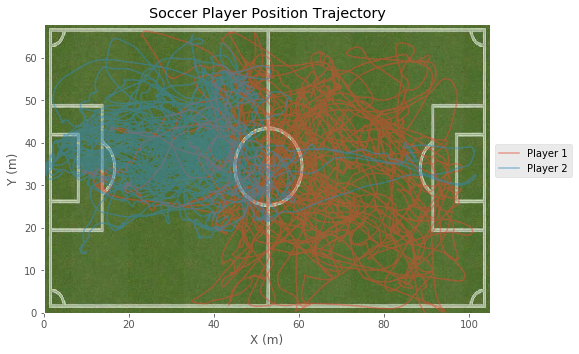

In [30]:
player_1 = soccer[soccer.tag_id == 1][['x', 'y']].as_matrix()
player_2 = soccer[soccer.tag_id == 2][['x', 'y']].as_matrix()
soccer_field = plt.imread('soccer_field.png')

plt.figure(figsize=(8, 6))
plt.imshow(soccer_field, extent=[0, 105, 0, 68])
plt.plot(player_1[:, 0], player_1[:, 1], alpha=0.5, label='Player 1')
plt.plot(player_2[:, 0], player_2[:, 1], alpha=0.5, label='Player 2')

plt.title('Soccer Player Position Trajectory')
plt.xlabel(r'X (m)')
plt.ylabel(r'Y (m)')
plt.xlim(0, 105)
plt.ylim(0, 68)
plt.grid(False)
plt.legend(bbox_to_anchor=(1., 0.6))
plt.show()

That is useful, but shows some players will of course not travel the full pitch. Let's build a heatmap from the full collection of players to get a better representation of the data. 

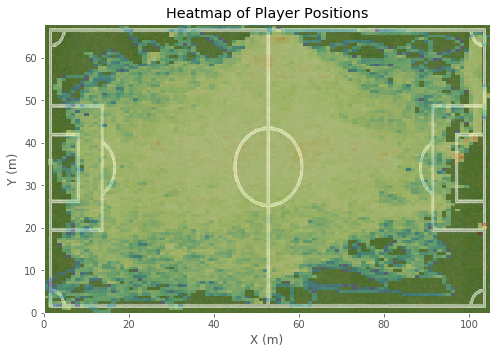

In [39]:
his, ext = np.histogramdd(soccer[['x', 'y']].as_matrix(), bins=100)
loglike = -np.ma.log(his / his.sum())
extent = [ext[0].min(), ext[0].max(), ext[1].min(), ext[1].max()]

plt.figure(figsize=(8, 6))
plt.imshow(soccer_field, extent=[0, 105, 0, 68])
plt.imshow(loglike, cmap=plt.cm.Spectral, alpha=0.5, extent=[0, 105, 0, 68])

plt.title('Heatmap of Player Positions')
plt.xlabel(r'X (m)')
plt.ylabel(r'Y (m)')
plt.grid(False)
plt.show()
plt.show()

# Running PCA

The prilimenary data already shows, that clearly up and down, and side to side are dominant motions for soccer players, but let's quantify this with PCA. 

`PCA` is available from Scikit-Learn in [`sklearn.decomposition`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Like all `scikit-learn` modules it has a very simple to use API.

In [ ]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2).fit(soccer[['x', 'y']].as_matrix())

The principal components, or the eigenvector of the covariance matrix, is store in a matrix that transforms our original number of features to the number of components. As these are both 2 for our example, we get a $2\times2$ matrix.

In [90]:
pca.components_

array([[ 0.98277979,  0.18478064],
       [ 0.18478064, -0.98277979]])

These components are also the direction of our transformation! Let's use them to visual the principal components on our original dataset. 

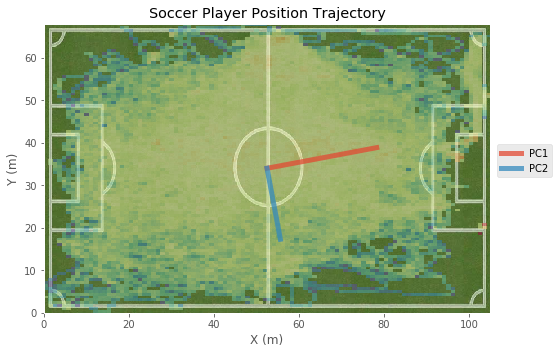

In [40]:
plt.figure(figsize=(8, 6))
plt.imshow(soccer_field, extent=[0, 105, 0, 68])

plt.imshow(loglike, cmap=plt.cm.Spectral, alpha=0.5, extent=[0, 105, 0, 68])

c = [105 / 2, 68 / 2]
c0 = np.array([c + 105 / 4 * pca.components_[0], c]).T
c1 = np.array([c + 68 / 4 * pca.components_[1], c]).T
plt.plot(c0[0], c0[1], linewidth=5, alpha=0.75, label='PC1')
plt.plot(c1[0], c1[1], linewidth=5, alpha=0.75, label='PC2')

plt.title('Soccer Player Position Trajectory')
plt.xlabel(r'X (m)')
plt.ylabel(r'Y (m)')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.15, 0.6))
plt.show()